# Model selection

In this notebook, we implement a similar functionality as in the example ```003_evaluation_one_dataset``` but using the ```model_selection``` function which simplifies the workflow by returning the oversampler and classifier combination providing the highest score.

In [1]:
import smote_variants as sv

2022-08-16 15:22:24.986515: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 15:22:25.149913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 15:22:25.149943: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset = sv.datasets.load_illustration_2_class()

In [3]:
# Specifying the classifiers.

classifiers = [('sklearn.neighbors', 'KNeighborsClassifier', {}),
                ('sklearn.tree', 'DecisionTreeClassifier', {})]

In [4]:
oversamplers = [('smote_variants', 'SMOTE_ENN', {}),
                ('smote_variants', 'NEATER', {}),
                ('smote_variants', 'Lee', {})]

In [5]:
# Executing the model selection using 5 parallel jobs and at most 35 random but meaningful parameter combinations
# with the oversamplers.

samp_obj, cl_obj= sv.evaluation.model_selection(dataset=dataset,
                                        oversamplers=oversamplers,
                                        classifiers=classifiers,
                                        n_jobs=2)

2022-08-16 15:22:37.171102: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 15:22:37.171080: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-16 15:22:37.235560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-16 15:22:37.235557: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot ope

In [6]:
# Oversampling and training the classifier providing the best results in the model selection procedure

X_samp, y_samp= samp_obj.sample(dataset['data'], dataset['target'])
cl_obj.fit(X_samp, y_samp)

2022-08-16 15:22:44,699:INFO:Lee: Running sampling via ('Lee', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'rejection_level': 0.5, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'uniform', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'Lee'}")
2022-08-16 15:22:44,704:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-08-16 15:22:44,707:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-08-16 15:22:44,711:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-08-16 15:22:44,718:INFO:Lee: simplex sampling with n_dim 2
2022-08-16 15:22:44,723:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-08-16 15:22:44,728:INFO:Lee: simplex sampling with n_dim 2
2022-08-16 15:22:44,731:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


KNeighborsClassifier()

In [7]:
from smote_variants.visualization import plot_sampling_raw
import matplotlib.pyplot as plt

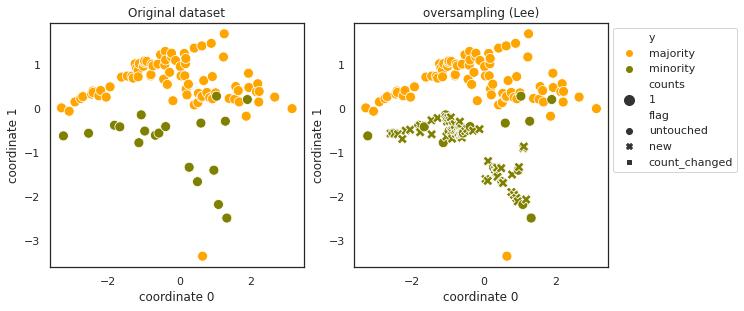

In [8]:
# plotting the oversampling with the best oversampler
_ = plot_sampling_raw(X=dataset['data'], y=dataset['target'],
                        X_samp=X_samp,
                        y_samp=y_samp,
                        title=f"oversampling ({samp_obj.__class__.__name__})")
plt.show()

In [9]:
# the fitted predictor
cl_obj.predict(dataset['data'])

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])